In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Load data from files

In [41]:
inferno = pd.read_csv("data/train-grenades-de_inferno.csv")
mirage = pd.read_csv("data/train-grenades-de_mirage.csv")

In [42]:
inferno

,Unnamed: 0,demo_id,demo_round_id,round_start_tick,weapon_fire_id,team,detonation_raw_x,detonation_raw_y,detonation_raw_z,throw_from_raw_x,throw_from_raw_y,throw_from_raw_z,throw_tick,detonation_tick,LABEL,TYPE,map_name
0,0,5158,46311,159689,6573932,CT,448.4950,3380.300,222.4680,864.899658,2389.010254,144.062393,13344,13566.0,True,flashbang,de_inferno
1,1,5595,55563,397002,7899867,T,778.6860,2274.620,137.7930,455.041687,3182.332275,160.031250,11044,11352.0,True,smoke,de_inferno
2,2,5596,55589,305379,7903151,T,1447.9700,896.635,144.4740,-279.968750,-268.968750,29.181963,3193,3871.0,True,smoke,de_inferno
3,3,5596,55595,397002,7904064,T,2717.1800,318.481,552.7410,1880.825562,571.397339,222.031250,10406,10628.0,True,flashbang,de_inferno
4,4,788,42597,71501,6039404,T,313.6380,2291.220,396.4490,1166.624634,2799.950684,127.641594,2873,3095.0,True,flashbang,de_inferno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,349,596,42744,45262,6063867,T,2479.9600,-107.194,86.0312,1431.441772,130.297836,127.680000,10722,10952.0,True,molotov,de_inferno
350,350,5596,55582,187969,7902073,T,490.8890,3166.080,162.0310,110.810173,1569.611816,132.013687,11141,11843.0,True,smoke,de_inferno
351,351,5452,51765,93628,7371564,T,982.5730,2677.020,129.9930,611.807983,1969.810059,130.363892,8960,9196.0,True,smoke,de_inferno
352,352,645,42494,370398,6024136,T,-13.2019,1426.310,102.8550,1263.402222,2981.905029,135.901749,7269,8025.0,False,smoke,de_inferno


In [51]:
grenades = pd.concat([inferno, mirage], ignore_index = True)
grenades = grenades.loc[:, ['team','detonation_raw_x','detonation_raw_y', 'detonation_raw_z','throw_from_raw_x', 'throw_from_raw_y', 'throw_from_raw_z', 'throw_tick', 'detonation_tick', 'LABEL', 'TYPE', 'map_name']]
grenades

,team,detonation_raw_x,detonation_raw_y,detonation_raw_z,throw_from_raw_x,throw_from_raw_y,throw_from_raw_z,throw_tick,detonation_tick,LABEL,TYPE,map_name
0,CT,448.495,3380.300,222.4680,864.899658,2389.010254,144.062393,13344,13566.0,True,flashbang,de_inferno
1,T,778.686,2274.620,137.7930,455.041687,3182.332275,160.031250,11044,11352.0,True,smoke,de_inferno
2,T,1447.970,896.635,144.4740,-279.968750,-268.968750,29.181963,3193,3871.0,True,smoke,de_inferno
3,T,2717.180,318.481,552.7410,1880.825562,571.397339,222.031250,10406,10628.0,True,flashbang,de_inferno
4,T,313.638,2291.220,396.4490,1166.624634,2799.950684,127.641594,2873,3095.0,True,flashbang,de_inferno
...,...,...,...,...,...,...,...,...,...,...,...,...
719,T,-1462.400,728.349,-45.9688,-1959.668213,704.495361,-47.968750,14328,14564.0,True,smoke,de_mirage
720,CT,-756.819,-2198.980,-159.1930,-593.158081,-1179.779297,-167.968750,9318,9540.0,False,flashbang,de_mirage
721,CT,-696.054,-1541.940,59.4860,-918.049866,-2595.171631,-167.968750,11433,11657.0,True,flashbang,de_mirage
722,CT,529.241,-1621.910,-262.0000,5.098903,-1576.270996,-170.078476,3034,3342.0,True,smoke,de_mirage


In [84]:
grenades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   team                       724 non-null    object 
 1   detonation_raw_x           724 non-null    float64
 2   detonation_raw_y           724 non-null    float64
 3   detonation_raw_z           724 non-null    float64
 4   throw_from_raw_x           724 non-null    float64
 5   throw_from_raw_y           724 non-null    float64
 6   throw_from_raw_z           724 non-null    float64
 7   throw_tick                 724 non-null    int64  
 8   detonation_tick            724 non-null    float64
 9   LABEL                      724 non-null    bool   
 10  TYPE                       724 non-null    object 
 11  map_name                   724 non-null    object 
 12  throw_dist                 724 non-null    float64
 13  throw_to_detonation_ticks  724 non-null    float64

In [53]:
grenades.describe()

,detonation_raw_x,detonation_raw_y,detonation_raw_z,throw_from_raw_x,throw_from_raw_y,throw_from_raw_z,throw_tick,detonation_tick
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,157.551721,180.640215,71.953754,297.086266,172.226112,-26.001280,6714.269337,7051.835635
std,1105.911713,1480.500883,219.299893,1055.338583,1395.506050,154.686508,3947.466559,3941.110552
min,-2389.260000,-2782.130000,-365.589000,-2551.528809,-2595.171631,-367.968750,1574.000000,1910.000000
25%,-678.260750,-922.384000,-165.433500,-441.834808,-776.138321,-167.968750,3418.250000,3677.500000
50%,195.235500,101.580000,114.421000,329.095703,138.886826,-45.968750,5768.000000,6052.000000
75%,985.894000,1120.520000,162.031000,1153.801910,952.328186,129.890339,9179.000000,9456.500000
max,2717.180000,3413.390000,868.790000,2634.000732,3566.003174,292.031250,24566.000000,24788.000000


In [93]:
grenades['throw_dist'] = np.sqrt((grenades['throw_from_raw_x'] - grenades['detonation_raw_x'])**2 + 
                                   (grenades['throw_from_raw_y'] - grenades['detonation_raw_y'])**2 +
                                   (grenades['throw_from_raw_z'] - grenades['detonation_raw_z'])**2)
grenades['throw_to_detonation_ticks'] = grenades['detonation_tick'] - grenades['throw_tick']
grenades = grenades[['team', 'LABEL', 'TYPE','map_name', 'throw_dist', 'throw_to_detonation_ticks']]
grenades

,team,LABEL,TYPE,map_name,throw_dist,throw_to_detonation_ticks
0,CT,True,flashbang,de_inferno,1078.051779,222.0
1,T,True,smoke,de_inferno,963.940743,308.0
2,T,True,smoke,de_inferno,2087.509684,678.0
3,T,True,flashbang,de_inferno,934.250694,222.0
4,T,True,flashbang,de_inferno,1028.907444,222.0
...,...,...,...,...,...,...
719,T,True,smoke,de_mirage,497.844023,236.0
720,CT,False,flashbang,de_mirage,1032.294524,222.0
721,CT,True,flashbang,de_mirage,1100.143034,224.0
722,CT,True,smoke,de_mirage,534.094957,308.0


We can observe, that almost all flashbangs have around 222-224 throw_to_detonation_ticks

In [94]:
grenades.loc[grenades['TYPE'] == 'flashbang'].describe()

,throw_dist,throw_to_detonation_ticks
count,244.000000,244.000000
mean,959.462350,225.930328
std,392.631911,37.710060
min,135.560262,220.000000
25%,686.816151,222.000000
50%,958.268076,224.000000
75%,1190.362427,224.000000
max,2226.088532,812.000000


In [95]:
grenades.loc[grenades['TYPE'] == 'smoke'].describe()

,throw_dist,throw_to_detonation_ticks
count,388.000000,388.000000
mean,1073.142850,438.221649
std,666.537773,253.411957
min,22.761585,22.000000
25%,549.008449,236.000000
50%,931.136502,340.000000
75%,1447.962145,648.000000
max,2803.267093,1296.000000


In [96]:
grenades.loc[grenades['TYPE'] == 'molotov'].describe()

,throw_dist,throw_to_detonation_ticks
count,92.000000,92.000000
mean,1017.518847,209.141304
std,425.692343,47.339220
min,140.643516,70.000000
25%,791.821590,176.500000
50%,1061.340109,215.000000
75%,1167.940659,245.000000
max,3557.371518,278.000000


In [86]:
grenades_cat = grenades[['team', 'LABEL', 'TYPE', 'map_name']]
grenades_num = grenades[['throw_dist', 'throw_to_detonation_ticks']]

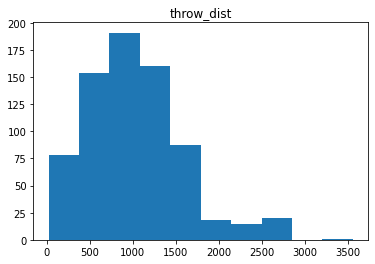

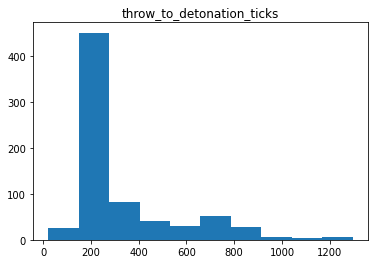

In [88]:
for i in grenades_num.columns:
    plt.hist(grenades_num[i])
    plt.title(i)
    plt.show()

The huge spike around 200 in throw_to_detonation_ticks are flashbangs, which all have around 222-224 in that column

Below, we check the average values of throw_dist and throw_to_detonation_ticks for either of the LABEL values for all grenades

In [92]:
pd.pivot_table(grenades, index='LABEL', values=['throw_dist', 'throw_to_detonation_ticks'])

,throw_dist,throw_to_detonation_ticks
LABEL,,
False,969.485891,331.887417
True,1043.119727,339.062827


Here we do it only for flashbangs

In [97]:
pd.pivot_table(grenades.loc[grenades['TYPE'] == 'flashbang'], index='LABEL',
               values=['throw_dist', 'throw_to_detonation_ticks'])

,throw_dist,throw_to_detonation_ticks
LABEL,,
False,919.827368,223.325000
True,967.233916,226.441176


And here, for every grenade that is not a flashbang

In [98]:
pd.pivot_table(grenades.loc[grenades['TYPE'] != 'flashbang'], index='LABEL',
               values=['throw_dist', 'throw_to_detonation_ticks'])

,throw_dist,throw_to_detonation_ticks
LABEL,,
False,987.380854,371.009009
True,1085.072859,401.325203


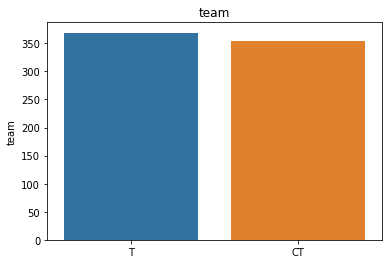

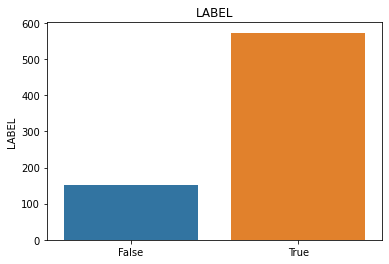

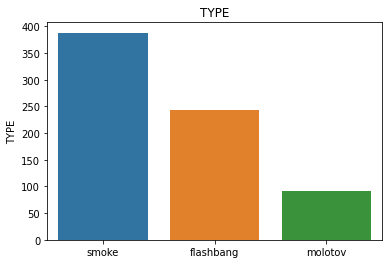

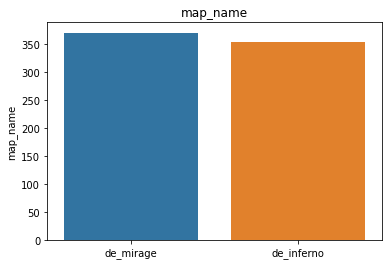

In [102]:
for i in grenades_cat.columns:
    sns.barplot(x=grenades_cat[i].value_counts().index, y=grenades_cat[i].value_counts()).set_title(i)
    plt.show()

In [46]:
grenades['LABEL'] = grenades['LABEL'].apply(lambda x: 1 if x is True else 0)

In [47]:
grenades

,team,detonation_raw_x,detonation_raw_y,detonation_raw_z,throw_from_raw_x,throw_from_raw_y,throw_from_raw_z,throw_tick,detonation_tick,LABEL,TYPE,map_name
0,CT,448.495,3380.300,222.4680,864.899658,2389.010254,144.062393,13344,13566.0,0,flashbang,de_inferno
1,T,778.686,2274.620,137.7930,455.041687,3182.332275,160.031250,11044,11352.0,0,smoke,de_inferno
2,T,1447.970,896.635,144.4740,-279.968750,-268.968750,29.181963,3193,3871.0,0,smoke,de_inferno
3,T,2717.180,318.481,552.7410,1880.825562,571.397339,222.031250,10406,10628.0,0,flashbang,de_inferno
4,T,313.638,2291.220,396.4490,1166.624634,2799.950684,127.641594,2873,3095.0,0,flashbang,de_inferno
...,...,...,...,...,...,...,...,...,...,...,...,...
719,T,-1462.400,728.349,-45.9688,-1959.668213,704.495361,-47.968750,14328,14564.0,0,smoke,de_mirage
720,CT,-756.819,-2198.980,-159.1930,-593.158081,-1179.779297,-167.968750,9318,9540.0,0,flashbang,de_mirage
721,CT,-696.054,-1541.940,59.4860,-918.049866,-2595.171631,-167.968750,11433,11657.0,0,flashbang,de_mirage
722,CT,529.241,-1621.910,-262.0000,5.098903,-1576.270996,-170.078476,3034,3342.0,0,smoke,de_mirage


In [49]:
dummies = pd.get_dummies(grenades[['team', 'TYPE', 'map_name']])
dummies

,team_CT,team_T,TYPE_flashbang,TYPE_molotov,TYPE_smoke,map_name_de_inferno,map_name_de_mirage
0,1,0,1,0,0,1,0
1,0,1,0,0,1,1,0
2,0,1,0,0,1,1,0
3,0,1,1,0,0,1,0
4,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...
719,0,1,0,0,1,0,1
720,1,0,1,0,0,0,1
721,1,0,1,0,0,0,1
722,1,0,0,0,1,0,1
